# 图像特效-灯光

In [1]:
from scipy import signal
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [2]:
src = cv2.imread('../datas/sunset2.jpg')
gray = cv2.imread('../datas/sunset2.jpg',0)
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)

In [5]:
def light(src,power):
    srcf = np.float32(src)
    if len(src.shape) < 3:
        srcf = cv2.cvtColor(src,cv2.COLOR_GRAY2RGB).astype(np.float32)
    dst = np.zeros_like(srcf)
    rows,cols = src.shape[0],src.shape[1]
    midX = cols // 2
    midY = rows // 2
    radius = np.sqrt(midX ** 2 + midY ** 2)
    radius2 = radius ** 2
    for i in range(rows):
        for j in range(cols):
            distance2 = (j - midX) ** 2 + (i - midY) ** 2
            if distance2 < radius2:
                distance = np.sqrt(distance2)
                brightness = power * (radius - distance) / radius
                dst[i,j] = src[i,j] * brightness
    dst = np.clip(dst,0,255)
    return np.uint8(dst)

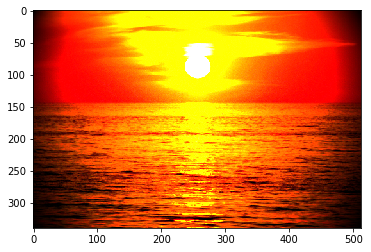

In [7]:
dst = light(rgb,10)
plt.imshow(dst)